<a href="https://colab.research.google.com/github/s28629/PAD_final_project/blob/main/Jacek_Piekut_28629_PAD_final_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
##Installing external libraries
---

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.7 MB/s eta 0:00:00


In [2]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.837s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



---
##Loading external libraries
---

In [3]:
########################################################################################################################
########################################################################################################################

import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import statsmodels.api    as sm
import streamlit          as st

########################################################################################################################
########################################################################################################################

---
##Loading specific functionalities from external libraries
---

In [4]:
########################################################################################################################
########################################################################################################################

from google.colab import drive

from scipy.stats                import zscore

from sklearn.ensemble           import RandomForestRegressor, BaggingRegressor,   AdaBoostRegressor
from sklearn.linear_model       import LinearRegression,      LogisticRegression, Ridge,            Lasso
from sklearn.metrics            import accuracy_score,        mean_squared_error
from sklearn.model_selection    import cross_val_score,       train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.utils              import resample

########################################################################################################################
########################################################################################################################

---
##Loading dataset

---

In [5]:
########################################################################################################################

drive.mount('/content/drive')

###########################################

Mounted at /content/drive


In [6]:
########################################################################################################################

location        = '/content/drive/MyDrive/courses/part_2/PAD/final_project_form/'
name_of_dataset = 'real_estate_dataset.csv'
dataset_path    = location + name_of_dataset

########################################################################################################################

In [7]:
########################################################################################################################
# loading the dataset

df = pd.read_csv(filepath_or_buffer=dataset_path)

########################################################################################################################

---
##Exploratory data analysis
---

In [8]:
########################################################################################################################

# displaying the number of records loaded

num_records = len(df)

print("Number of Records Loaded:", num_records)

########################################################################################################################

Number of Records Loaded: 414


---
###Missing values detection
---

In [9]:
########################################################################################################################
# displaying the number of missing entries in each column

missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)

########################################################################################################################

Missing Values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


---
###Column types analysis
---

In [10]:
########################################################################################################################
# displaying the types of columns

column_types = df.dtypes

print("Column Types:")
print(column_types)

########################################################################################################################

Column Types:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


---
###Displaying sample of records from dataset
---

In [11]:
########################################################################################################################
# displaying the first few rows of the dataset

print("Sample Data:")

print(df.head())

########################################################################################################################

Sample Data:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746   

---
###Statistical summary overview
---

In [12]:
########################################################################################################################
# statistical Summary

print("Statistical Summary:")

print(df.describe())

########################################################################################################################

Statistical Summary:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience 

---
###Correlation analysis between predictors and response
---

In [13]:
########################################################################################################################
# performing correlation analysis between house price and other variables

price_correlations = df.corr()['Y house price of unit area'].drop(['Y house price of unit area', 'No'])

print("\nCorrelation with House Price:")
print(price_correlations)

########################################################################################################################


Correlation with House Price:
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Name: Y house price of unit area, dtype: float64


---
###Correlation analysis between specific predictors
---

In [14]:
########################################################################################################################
# detailed correlation analysis

print("Correlation Analysis:")

correlation_matrix = df.corr().drop(columns=['No'])

print(correlation_matrix)

########################################################################################################################

Correlation Analysis:
                                        X1 transaction date  X2 house age  \
No                                                -0.048658     -0.032808   
X1 transaction date                                1.000000      0.017549   
X2 house age                                       0.017549      1.000000   
X3 distance to the nearest MRT station             0.060880      0.025622   
X4 number of convenience stores                    0.009635      0.049593   
X5 latitude                                        0.035058      0.054420   
X6 longitude                                      -0.041082     -0.048520   
Y house price of unit area                         0.087491     -0.210567   

                                        X3 distance to the nearest MRT station  \
No                                                                   -0.013573   
X1 transaction date                                                   0.060880   
X2 house age                          

---
###heatmap analysis
---

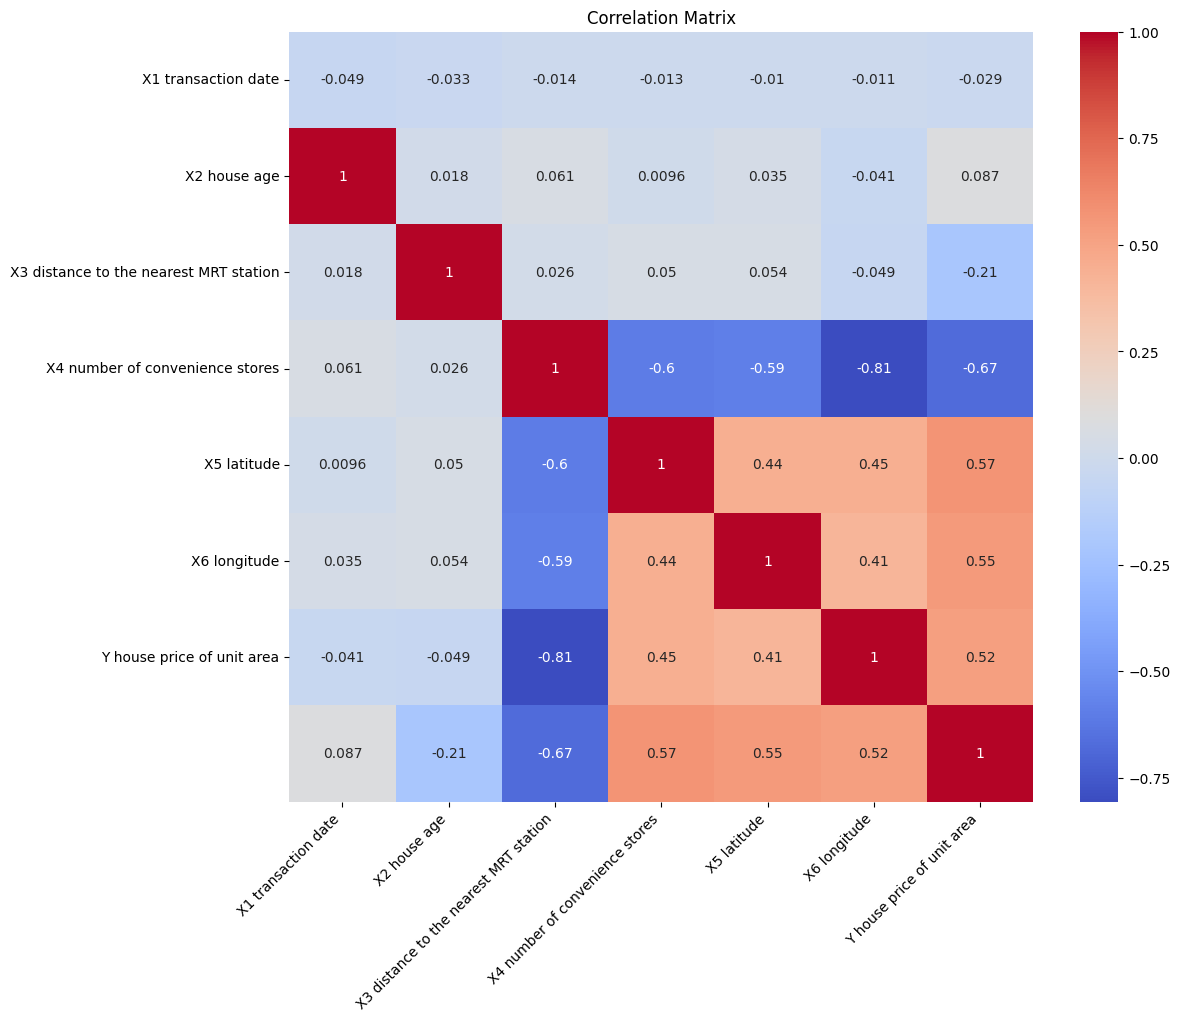

In [15]:
########################################################################################################################
# data visualsation

plt.figure(figsize=(12, 10))

sns.heatmap(
              data=correlation_matrix,
              annot=True,
              cmap="coolwarm",
              xticklabels=correlation_matrix.columns,
              yticklabels=correlation_matrix.columns,
              cbar=True
            )

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix")

plt.savefig("heatmap.png")

plt.show()

########################################################################################################################